<!--アニメーションは残念ならiPython notebook内では表示できないようだ。-->

すでに使いなれたプロッティングツール(例えばgnuplot)があるのに、おなじことをPythonでやりなおす必要は感じないと思いますが、MatPlotLibはPythonのいろんなライブラリでグラフを描くための事実上の標準になっているので、使いかたに慣れておくと、いろいろ便利なことがあります。

松本も日常MatPlotLibを使っているわけではないので、練習をかねてgnuplot (http://gnuplot.sourceforge.net) でできることを、MatPlotLibでひととおり試してみます。

## 2次元: XYプロット
### 数式のプロット
gnuplotでは、数式を直接指定する方法があるが、MatPlotLibは数値のプロットしかできないので、数式をプロットしたい場合は、numpyで数値化してからプロットする。整数のリストを生じるrangeを拡張した、arangeという関数がnumpyに備わっているので、これを使えば単調増加数列は簡単に作れる。また、numpyの数学関数を使うと、arrayに対して演算ができる。

In [ ]:
import numpy as np

x = np.arange(-10,10,0.1)        #xは-10から+10まで0.1間隔の値のarray
print(x)

arrayに対して通常の演算を行うと、個々の要素に作用する。この例の場合、xのすべての要素が個別に二乗される。

In [ ]:
y=x**2
y

In [ ]:
%matplotlib inline               
#ウェブ画面上にグラフを描くためのおまじない

import matplotlib.pyplot as plt  #プロットライブラリの本体

plt.plot(x,y)

arrayに対して通常の演算を行うと、個々の要素に作用する。そのための数学関数がnumpyにすべて準備されている。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-10,10,0.1)        #xは-10から+10まで0.1間隔の値のarray
y = np.exp(-x**2/5)              #yの値はxから算出する。
plt.xlim(-20,20)                 #プロット範囲指定
plt.plot(x,y)

### データのプロット
まずは、手作りデータをプロットしてみる。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = [1,2,4,8,16]
y = [2,3,5,7,11]
plt.plot(x,y)

2つのy値を与えて同時にプロットすることはできるだろうか。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = [1,2,4,8,16]
y = [[2,1],[3,2],[5,3],[7,4],[11,5]]
plt.plot(x,y)

numpy形式のデータでも試す。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.array([1,2,4,8,16])
y = np.array([2,3,5,7,11])
plt.plot(x,y)

2本同時プロットもnumpyでできるはず。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.array([1,2,4,8,16])
y = np.array([[2,1],[3,2],[5,3],[7,4],[11,5]])
plt.plot(x,y)

じゃあ、数式プロットで2本同時に線を引いてみよう。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-1,1,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y = (y1,y2)
plt.plot(x,y)

なになに、xとyは同じdimensionでないといけない、と言われた。確かに、xにはx[0]からx[100]あたりまでデータがあるのに対し、yにはy[0]とy[1]しかなく、その中にarrayが入っていて、xとyの見掛けのリスト(array)の大きさが違う。そこで、yは転置してみよう。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-1,1,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y = (y1,y2)
print("Y before transposition:",y)
y = np.transpose(y)
print(x)
print("Y after transposition:",y)
plt.plot(x,y)

x,y座標の羅列をファイルから読みこんで、そのまま線でプロットする。

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plotを何度も呼びだせば、同じグラフにどんどん重ねてくれるようだ。

showをはさむと、別のパネルに表示される。(たぶん)

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()
plt.plot(x,y3)

第3カラムを誤差とみなして、エラーバー付きでプロットしてみる。

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.errorbar(x,y1,yerr=y2)

MatPlotLibでは、異なるタイプのプロットをする場合には、それぞれ異なる関数を呼ぶらしい。

点でプロットする場合には、plot関数の3番目の引数で指定する。(http://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html)

線のスタイルを変更するオプションもいろいろある。(http://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html)

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))

#matplotlibはnumpyのarrayでなくてもプロットできるが、arrayのほうが便利
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)


plt.plot(x,y1,".")
plt.plot(x,y2+y3,linewidth=3)


せっかく画面にきれいに描けても、論文に載せられないとありがたくない。PDFでの出力を試す。(http://matplotlib.org/api/backend_pdf_api.html)

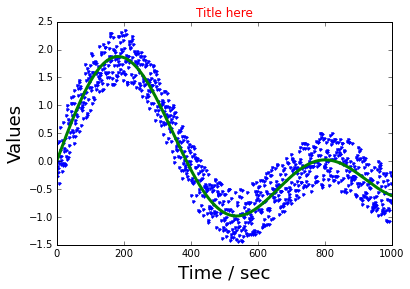

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体
from matplotlib.backends.backend_pdf import PdfPages  #PDF出力

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))

#matplotlibはnumpyのarrayでなくてもプロットできるが、arrayのほうが便利
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)


plt.plot(x,y1,".")
plt.plot(x,y2+y3,linewidth=3)
#フォントを指定し、labelを付ける。
plt.rc('font', family='serif')
plt.title("Title here", color="red")
plt.xlabel('Time / sec', fontsize = 18)
plt.ylabel('Values',     fontsize = 18)

#PDF化のために追加
pp = PdfPages('test.pdf')
pp.savefig()
pp.close()


MatPlotLibのサンプルページ(http://matplotlib.org/gallery.html )を見ると、ほかにも相当いろんな表現ができるようだ。全部網羅していては時間が足りないので、必要があればその都度紹介することにする。

## 3次元データ
3次元の場合、関数をプロットするにも一苦労する。必要が生じるまで、あまり深入りしないことにしよう。

インライン表示だと視点を変えられないが、ウィンドウ表示にすれば、3次元プロットはマウスで回転できる。ウィンドウ表示にするには、先頭の%matplotlib inline行をなくし、カーネルを再起動する。

In [1]:
from mpl_toolkits.mplot3d import Axes3D   #'3d' projectionに必要。
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.abs(np.cos(X) + np.cos(Y))

surf = ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
ax.set_zlabel("Z-Label")
ax.set_zlim(0, 2)

plt.show()

## アニメーション
MatPlotLibはアニメーションもできると謳っているが、正直言って、gnuplotやMatPlotLibのようなプロッティングプログラムで、アニメーションを無理矢理描くことはあまり良い考えとは思えない。